In [ ]:
!pip install aix360

     |████████████████████████████████| 58.3 MB 1.4 MB/s 
     |████████████████████████████████| 109.3 MB 58 kB/s 
     |████████████████████████████████| 275 kB 52.6 MB/s 
     |████████████████████████████████| 109.7 MB 9.8 kB/s 
     |████████████████████████████████| 377 kB 52.1 MB/s 
     |████████████████████████████████| 264 kB 48.7 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
     |████████████████████████████████| 3.1 MB 49.6 MB/s 
     |████████████████████████████████| 488 kB 58.8 MB/s 
     |████████████████████████████████| 7.9 MB 50.4 MB/s 
     |████████████████████████████████| 121 kB 62.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for lime: filename=lime-0.1.1.37-py3-none-any.whl size=284290 sha256=18cbccfdd64af0a6820289d4cca842703b8a06fdcbad40d4f0a9371c2c08315f
  Stored in directory: /root/.cache/pip/wheels/5d/7a/8d/30e0ea15164fb80d5484e83ab991e18

In [ ]:
from __future__ import print_function
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import time
np.random.seed(1)

# Importing shap KernelExplainer (aix360 style)
from aix360.algorithms.shap import KernelExplainer

# the following import is required for access to shap plotting functions and datasets
import shap

# Load Data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)

# rather than use the whole training set to estimate expected values, we could summarize with
# a set of weighted kmeans, each weighted by the number of points they represent. But this dataset
# is so small we don't worry about it
#X_train_summary = shap.kmeans(X_train, 50)

def print_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_test) == Y_test)/len(Y_test)))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()

In [ ]:
# This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [ ]:
Y_train

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

# KNN

In [ ]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, Y_train)

print_accuracy(knn.predict)

Accuracy = 96.66666666666667%


# PDP & ICE

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

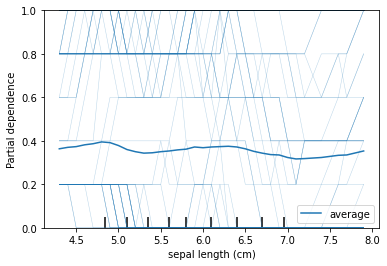

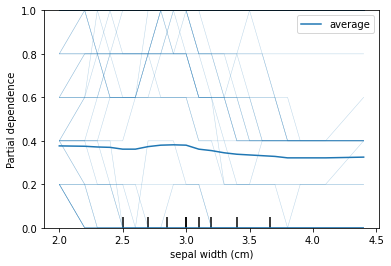

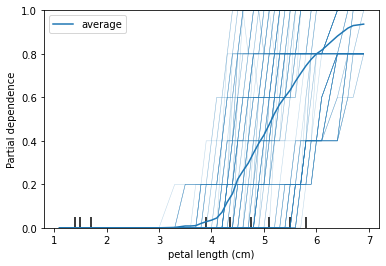

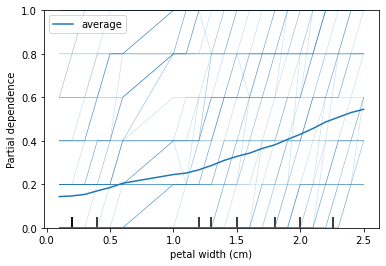

In [ ]:
# ICE and PDP that show dependence between the target function (probability that a given instance belongs to class 2 - Virginica) and an input feature of interest
PartialDependenceDisplay.from_estimator(knn, X_train, [0], target=2, kind='both')
PartialDependenceDisplay.from_estimator(knn, X_train, [1], target=2, kind='both')
PartialDependenceDisplay.from_estimator(knn, X_train, [2], target=2, kind='both')
PartialDependenceDisplay.from_estimator(knn, X_train, [3], target=2, kind='both')

# SHAP

In [ ]:
shapexplainer = KernelExplainer(knn.predict_proba, X_train)
print(type(shapexplainer))

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


<class 'aix360.algorithms.shap.shap_wrapper.KernelExplainer'>


In [ ]:
# average prediction of the model of each class
avg_prediction = shapexplainer.explainer.expected_value
avg_prediction

array([0.325, 0.31 , 0.365])

In [ ]:
X_test.iloc[0,:]

sepal length (cm)    5.8
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     2.4
Name: 114, dtype: float64

In [ ]:
# aix360 style for explaining input instances
shap_values = shapexplainer.explain_instance(X_test.iloc[0,:]) # first instance in test

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [ ]:
#shap_values of each feature in each class
shap_values

[array([-0.00125   , -0.00875   , -0.29791667, -0.01708333]),
 array([-0.01305556, -0.02833333,  0.01166667, -0.28027778]),
 array([0.01430556, 0.03708333, 0.28625   , 0.29736111])]

actual prediction (probability of the instance is in class 2): 1.0
average prediction (probability of the instance is in class 2: 0.3650000000000002
difference: 0.6349999999999998
the difference is explained by:


X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


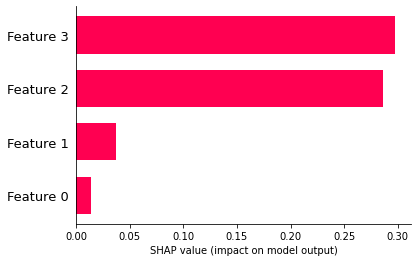

In [ ]:
print('actual prediction (probability of the instance is in class 2):', knn.predict_proba(np.array([X_test.iloc[0]]))[0,2])
print('average prediction (probability of the instance is in class 2:', avg_prediction[2])
print('difference:', knn.predict_proba(np.array([X_test.iloc[0]]))[0,2] - avg_prediction[2])
print('the difference is explained by:')
shap.plots.bar.bar_plot(shap_values[2])

In [ ]:
print('the sum of the shap vlaue is equal to the difference')
shap_values[2].sum()

the sum of the shap vlaue is equal to the difference


0.6349999999999998

# LIME

In [ ]:
# Importing LimeTextExplainer (aix360 sytle)
from aix360.algorithms.lime import LimeTabularExplainer

In [ ]:
limeexplainer = LimeTabularExplainer(X_train.to_numpy(), feature_names = X_train.columns, class_names = [0,1,2], mode = 'classification')
print(type(limeexplainer))

<class 'aix360.algorithms.lime.lime_wrapper.LimeTabularExplainer'>


In [ ]:
idx = 0
# aix360 style for explaining input instances
exp = limeexplainer.explain_instance(X_test.iloc[0,:], knn.predict_proba, labels = [0,1,2])
print('Predicted class =', knn.predict(np.array([X_test.iloc[0]]))[0])
print('True class: %s' % Y_test[0])

Predicted class = 2
True class: 2


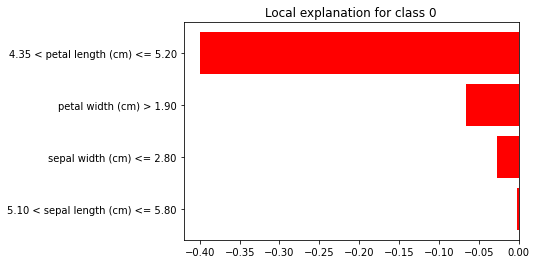

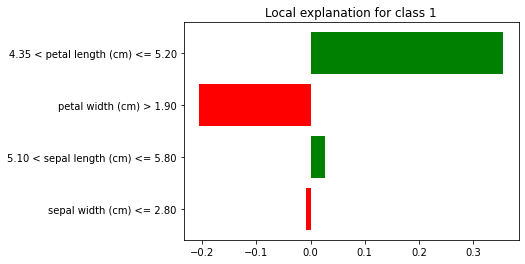

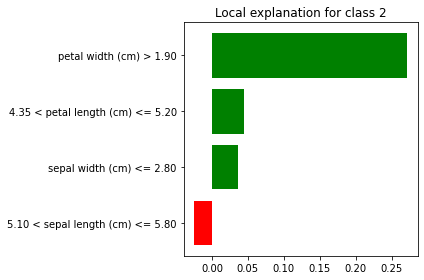

In [ ]:
exp.as_pyplot_figure(label=0)
exp.as_pyplot_figure(label=1)
exp.as_pyplot_figure(label=2)
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
X_test.iloc[0]

sepal length (cm)    5.8
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     2.4
Name: 114, dtype: float64